<a href="https://colab.research.google.com/github/nhocratac/demo1_git/blob/main/identified%20%20signals/CSHTnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/MachineLearning

/content/drive/MyDrive/MachineLearning


In [ ]:
pwd

'/content/drive/MyDrive/MachineLearning'

In [ ]:
ls

CSHTnet.ipynb  traffic-signs-data.zip


In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget
import wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=0651bac4ad92cc6cbd31185ac2b849fb0c22350c68019d183ea0056ef537d599
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
wget.download(link)

'traffic-signs-data.zip'

In [ ]:
data = "./"

In [ ]:
!unzip -q  traffic-signs-data.zip -d $data

In [ ]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [ ]:
import pickle

In [19]:
with open(train_link, mode="rb") as f:
  train = pickle.load(f)

In [20]:
with open(valid_link, mode="rb") as f:
  valid = pickle.load(f)

In [21]:
with open(test_link, mode="rb") as f:
  testtrain = pickle.load(f)

In [23]:
train


{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

in train ra màn hình

In [24]:
trainX = train['features']
trainT = train['labels']

In [25]:
validX = valid['features']
validT = valid['labels']

In [27]:
testtrainX = testtrain['features']
testtrainT = testtrain['labels']

In [28]:
import matplotlib.pyplot as plt


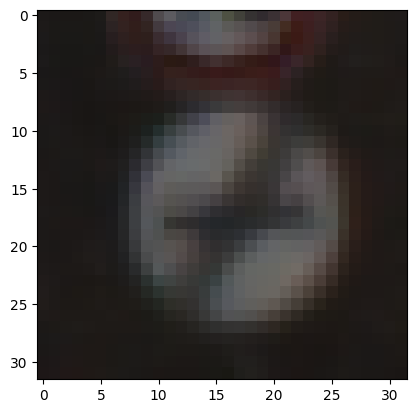

In [29]:
plt.imshow(trainX[0])

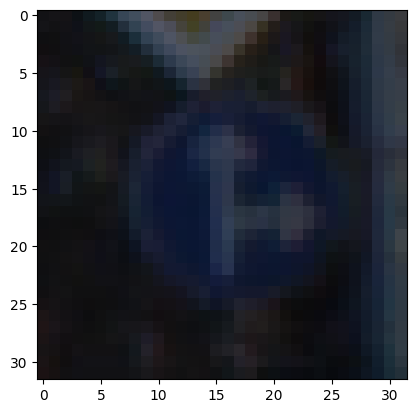

In [30]:
plt.imshow(trainX[1000])

in thử vài bức ảnh

In [31]:
ThangLable = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}

In [32]:
ThangLable[trainT[100]]

'End of no passing'

In [33]:
from sklearn.utils import shuffle

In [34]:
trainX,trainT = shuffle(trainX,trainT)

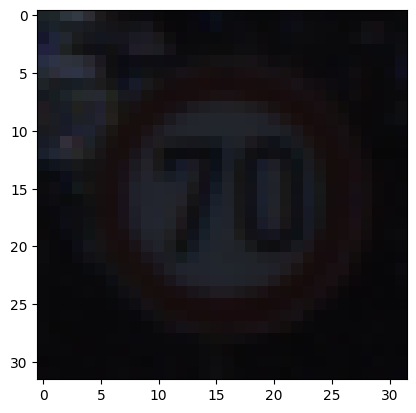

In [35]:
plt.imshow(trainX[100])

đã trộn dataset

In [36]:
trainX= trainX.astype('float')/255.0

In [37]:
validX= validX.astype('float')/255.0

In [38]:
testtrainX= testtrainX.astype('float')/255.0

In [39]:
trainX[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.95294118, 0.97647059, 0.92941176],
        [0.95686275, 0.98431373, 0.95294118],
        [0.97647059, 1.        , 0.98431373]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.96862745, 0.99215686, 0.96078431],
        [0.98431373, 0.99607843, 0.98431373],
        [0.99215686, 1.        , 0.99607843]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.98823529, 0.99607843, 0.98823529],
        [0.99607843, 1.        , 0.99607843],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [0.85098039, 0.85098039, 0.80392157],
        [0.25490196, 0

đã đưa giá trị thuộc (0,1)

In [40]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [43]:
trainT = lb.fit_transform(trainT)

In [42]:
validT = lb.fit_transform(validT)

In [44]:
valid['labels'][0]

41

In [45]:
validT[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [48]:
model = Sequential()

In [49]:
width = 32
height = 32
classes = 43 # 43 nhãn

In [50]:
shape = (width, height, 3)

In [51]:
model.add(Conv2D(32, (3, 3), padding="same", input_shape=shape))

In [53]:
model.add(Activation("relu"))

In [54]:
model.add(BatchNormalization())

In [55]:
model.add(Conv2D(32, (3, 3), padding="same"))

In [56]:
model.add(Activation("relu"))

In [58]:
model.add(BatchNormalization())

In [59]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [60]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [61]:
model.add(Activation("relu"))

In [62]:
model.add(BatchNormalization())

In [63]:
model.add(Conv2D(64, (3, 3), padding="same"))

In [64]:
model.add(Activation("relu"))

In [65]:
model.add(BatchNormalization())

In [66]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [67]:
model.add(Flatten())

In [68]:
model.add(Dense(512))

In [69]:
model.add(Activation("relu"))

In [70]:
model.add(BatchNormalization())

In [71]:
model.add(Dense(classes))

In [72]:
model.add(Activation("softmax"))

In [73]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                       

In [75]:
augment = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [76]:
learning_rate = 0.01

In [77]:
epochs = 10
# epoch
# Steps
#
batch_size = 64

In [78]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [79]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [80]:
print("bat dau training thui !!!")
H = model.fit_generator(augment.flow(trainX, trainT, batch_size=batch_size), validation_data=(validX, validT), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)

bat dau training thui !!!
Epoch 1/10


<ipython-input-80-83cec1028fb8>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(augment.flow(trainX, trainT, batch_size=batch_size), validation_data=(validX, validT), steps_per_epoch=trainX.shape[0]//batch_size, epochs=epochs, verbose=1)


543/543 [==============================] - 32s 48ms/step - loss: 1.8595 - accuracy: 0.4588 - val_loss: 1.6746 - val_accuracy: 0.5776
Epoch 2/10
543/543 [==============================] - 22s 40ms/step - loss: 0.7110 - accuracy: 0.7642 - val_loss: 1.3438 - val_accuracy: 0.6599
Epoch 3/10
543/543 [==============================] - 23s 42ms/step - loss: 0.3353 - accuracy: 0.8886 - val_loss: 0.7027 - val_accuracy: 0.7961
Epoch 4/10
543/543 [==============================] - 24s 44ms/step - loss: 0.2019 - accuracy: 0.9343 - val_loss: 0.5965 - val_accuracy: 0.8268
Epoch 5/10
543/543 [==============================] - 23s 42ms/step - loss: 0.1393 - accuracy: 0.9553 - val_loss: 0.4959 - val_accuracy: 0.8680
Epoch 6/10
543/543 [==============================] - 24s 43ms/step - loss: 0.1054 - accuracy: 0.9661 - val_loss: 0.6097 - val_accuracy: 0.8365
Epoch 7/10
543/543 [==============================] - 22s 40ms/step - loss: 0.0823 - accuracy: 0.9749 - val_loss: 0.5398 - val_accuracy: 0.8705
Epo

In [82]:
result = model.predict(testtrainX[100:101])

1/1 [==============================] - 1s 560ms/step


In [83]:
result

array([[4.23095713e-04, 9.99066532e-01, 1.80072348e-08, 7.75050857e-12,
        3.96448595e-04, 3.12616399e-09, 8.97591723e-10, 1.04153514e-04,
        8.51166078e-06, 6.00674399e-09, 1.28207115e-11, 2.62316147e-09,
        2.45057374e-09, 1.47043764e-07, 7.32195673e-08, 4.20158713e-10,
        4.53985933e-08, 2.33250064e-09, 2.29774932e-09, 9.65236424e-08,
        4.20842056e-10, 1.36545153e-09, 1.00411679e-09, 5.99408567e-09,
        2.59755552e-07, 5.97332885e-08, 5.73678260e-09, 2.23182735e-08,
        1.00793009e-08, 1.75545464e-11, 1.69684122e-09, 1.16297813e-12,
        2.19422105e-10, 3.97172464e-08, 7.35623429e-09, 2.86096586e-08,
        8.72815349e-08, 1.92550729e-07, 8.82100579e-08, 5.44854828e-08,
        3.21026548e-08, 4.83491114e-09, 1.53762947e-10]], dtype=float32)

In [85]:
import numpy as np

In [86]:
final = np.argmax(result)

In [87]:
final = ThangLable[final]

In [88]:
final

'Speed limit (30km/h)'

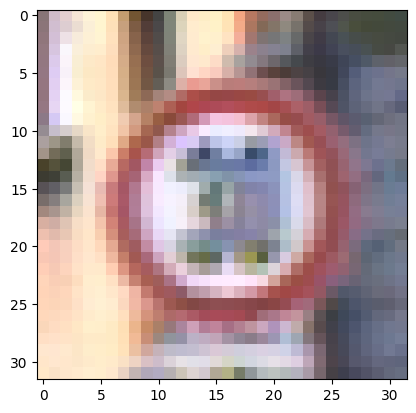

In [89]:
plt.imshow(testtrain['features'][100])

In [90]:
result = model.predict(testtrainX[4999:5000])

1/1 [==============================] - 0s 19ms/step


In [91]:
final = np.argmax(result)

In [92]:
ThangLable[final]

'Ahead only'

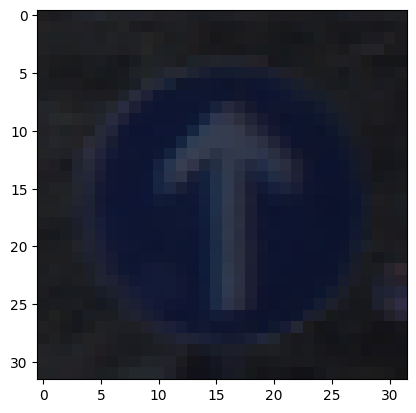

In [94]:
plt.imshow(testtrain['features'][4999])

1/1 [==============================] - 0s 77ms/step
Vehicles over 3.5 metric tons prohibited


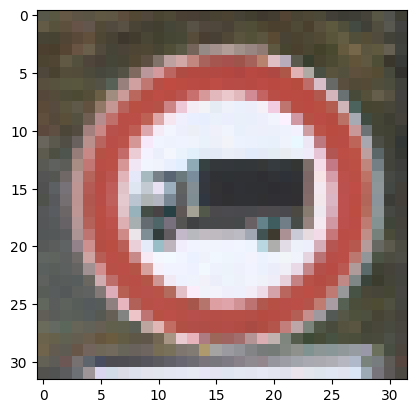

In [104]:
print(ThangLable[np.argmax(model.predict(testtrainX[1888:1889]))])
plt.imshow(testtrain['features'][1888])